## Statistical Analysis for Energy and Magnetization
To use the routine insert the desired file name in the filename variable parameter
A folder with the same name as the data file is generated with all the relevant plots.

In [1]:
import analysis_functions as af
import sys
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from pathlib import Path
import os


#filename = sys.argv[1]
filename = "monte_carlo_em_32.0_2.0_1.0_1.0_0.0_2.0_0.1_0.0_300.0_1.0"

Path("plots/" + filename).mkdir(parents=True, exist_ok=True)

data = np.loadtxt(r"../data/" + filename +".txt", skiprows = 2)
energy = data[:,0]
magnet = data[:,1]

plt.style.use("seaborn")

Some plots are generated to give an idea of the behvaior of the observable over MC time

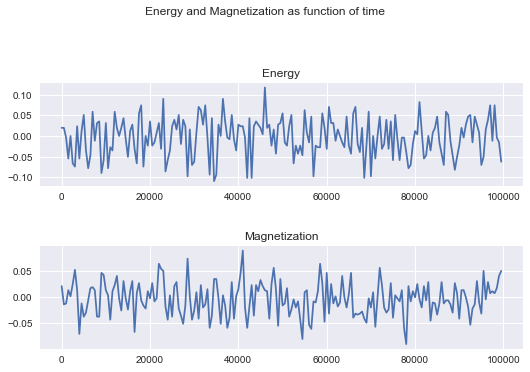

In [2]:
#basic plotting
fig,axs = plt.subplots(2)
fig.suptitle("Energy and Magnetization as function of time")

mc_time = np.arange(0,len(energy), 500)

axs[0].plot(mc_time,energy[::500])
axs[1].plot(mc_time,magnet[::500])
axs[0].set_title("Energy")
axs[1].set_title("Magnetization")
fig.tight_layout(pad = 3.0)
fig.savefig("plots/"+ filename +"/EM.png")

## Thermalization study

Study the state of thermalization by choosing a perc percentage parameter and 
checking whether the variance and mean are consistent in the sample and in the total data set
A default value is 0.07 for the portion of the whole data set


98000
14


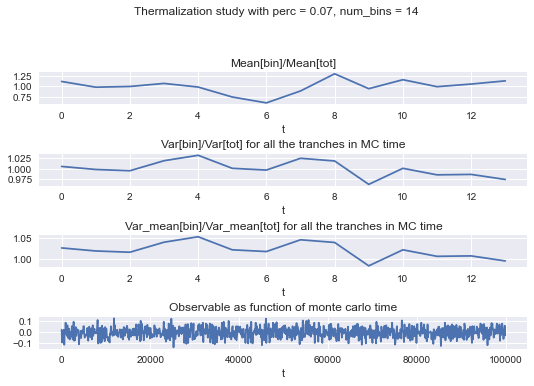

In [3]:
#energy study

perc = 0.07
mean_ens = af.mean(energy)
var_ens = af.var(energy)
var_mean_ens = af.mean_var(energy)
N = int(np.floor(perc*len(energy[:])))

num = int(np.floor(1/perc))
print(num*N)

thermaliz = np.array([[af.mean(energy[N*k:N*k+N]),af.var(energy[N*k:N*k+N]),
                            af.mean_var(energy[N*k:N*k+N])] 
                          for k in range(num)])


print(len(thermaliz))
x = np.arange(0,num)
time = np.arange(len(energy))
#fig = plt.figure(num = None, figsize=(12,12), dpi= 80, edgecolor="k")
#fig.canvas.set_window_title("Thermalization study")



fig,axs = plt.subplots(4)
fig.suptitle("Thermalization study with perc = {}, num_bins = {}".format(perc,num))
fig.tight_layout(pad=3.0)
axs[0].plot(x,thermaliz[:,0]/mean_ens)
axs[1].plot(x,thermaliz[:,1]/var_ens)
axs[2].plot(x,thermaliz[:,2]/var_mean_ens/num)
axs[3].plot(time[::100],energy[::100])
axs[0].set_xlabel("t")
axs[1].set_xlabel("t")
axs[2].set_xlabel("t")
axs[3].set_xlabel("t")
axs[0].title.set_text("Mean[bin]/Mean[tot]")
axs[1].title.set_text("Var[bin]/Var[tot] for all the tranches in MC time")
axs[2].title.set_text("Var_mean[bin]/Var_mean[tot] for all the tranches in MC time")
axs[3].title.set_text("Observable as function of monte carlo time")
plt.show()
fig.savefig("plots/"+ filename +"/Therm_energy.png")

14


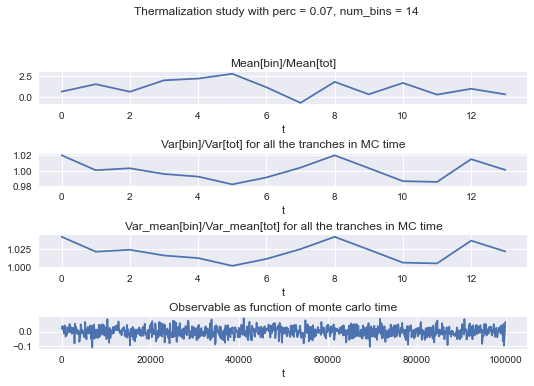

In [4]:
#magnetation study

perc = 0.07
mean_ens = af.mean(magnet)
var_ens = af.var(magnet)
var_mean_ens = af.mean_var(magnet)
N = int(np.floor(perc*len(magnet[:])))

num = int(np.floor(1/perc))

thermaliz = np.array([[af.mean(magnet[N*k:N*k+N]),af.var(magnet[N*k:N*k+N]),
                            af.mean_var(magnet[N*k:N*k+N])] 
                          for k in range(num)])


print(len(thermaliz))
x = np.arange(0,num)
time = np.arange(len(magnet))
#fig = plt.figure(num = None, figsize=(12,12), dpi= 80, edgecolor="k")
#fig.canvas.set_window_title("Thermalization study")



fig,axs = plt.subplots(4)
fig.suptitle("Thermalization study with perc = {}, num_bins = {}".format(perc,num))
fig.tight_layout(pad=3.0)
axs[0].plot(x,thermaliz[:,0]/mean_ens)
axs[1].plot(x,thermaliz[:,1]/var_ens)
axs[2].plot(x,thermaliz[:,2]/var_mean_ens/num)
axs[3].plot(time[::100],magnet[::100])
axs[0].set_xlabel("t")
axs[1].set_xlabel("t")
axs[2].set_xlabel("t")
axs[3].set_xlabel("t")
axs[0].title.set_text("Mean[bin]/Mean[tot]")
axs[1].title.set_text("Var[bin]/Var[tot] for all the tranches in MC time")
axs[2].title.set_text("Var_mean[bin]/Var_mean[tot] for all the tranches in MC time")
axs[3].title.set_text("Observable as function of monte carlo time")
plt.show()
fig.savefig("plots/" + filename + "/Therm_magnetization.png")


## Plot Aucotorrelation and find integrated time
After having defined the Thermalization time of the observables, and made sure to cutoff the non thermalized portion of the data, the autocorrelation of the data set is studied, some trails with the tmax allow to find a suitable tmax time to define the cutoff to then compute the integrated autocorrelation time, the value tmax to compute has to be chosen by the user and its dependent on the data set that is being studied.

In [21]:
#cut the portion of the data that isn't thermalized, a general cutoff of MC time > 10000 based on the data is recommended

#energy = energy[10000::]
#magnet = magnet[10000::]
#tmax to be chosen depending on the data set, the way to procede is by trying a few values and observing the plots
tmax = 7
time = np.arange(tmax)

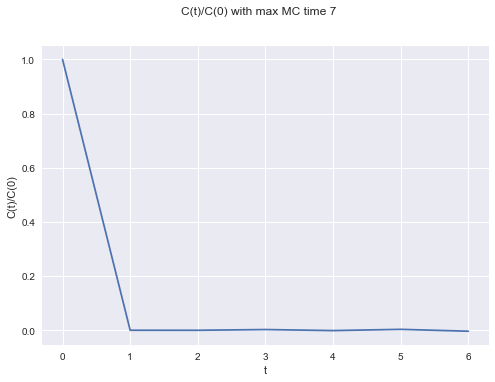

In [22]:
#energy
#create autocorrelation array

corr_en = 1/af.var(energy)*np.array([af.autocorrelation(energy,t)  for t in time])

fig,ax = plt.subplots()
fig.suptitle("C(t)/C(0) with max MC time {}".format(tmax))
ax.plot(time,corr_en)
ax.set_xlabel("t")
ax.set_ylabel("C(t)/C(0)")
plt.savefig("plots/" + filename + "/C(t)_energy.png")

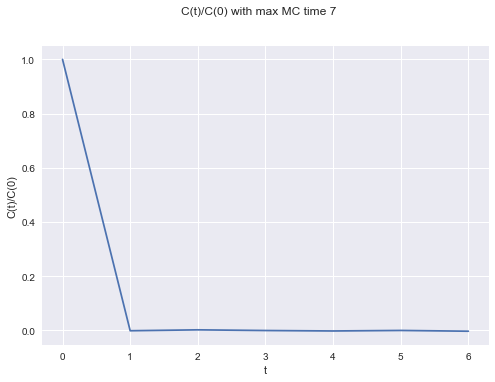

In [16]:
#magnetizaztion
#create autocorrelation array

corr_mg = 1/af.var(magnet)*np.array([af.autocorrelation(magnet,t)  for t in time])

fig,ax = plt.subplots()
fig.suptitle("C(t)/C(0) with max MC time {}".format(tmax))
ax.plot(time,corr_mg)
ax.set_xlabel("t")
ax.set_ylabel("C(t)/C(0)")
plt.savefig("plots/" + filename + "/C(t)_magnet.png")

Find the integrated autocorrelation time, the plot (tau,time) should reach a plateau once larger modes stop giving contributions from here through visual investigation a value of tau integrated time is chosen. 
This allows to compute a corrected variance of the mean that accounts for autocorrelation effects and also allows to 

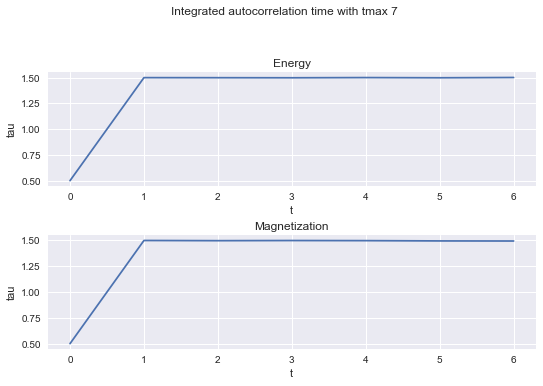

In [17]:
#energy and magnet

tau_en = np.array([af.integ_time(energy,t) for t in range(tmax)])
tau_mg = np.array([af.integ_time(magnet,t) for t in range(tmax)])

fig,axs = plt.subplots(2)
fig.suptitle("Integrated autocorrelation time with tmax {}".format(tmax))
fig.tight_layout(pad=3.0)
axs[0].plot(tau_en)
axs[1].plot(tau_mg)
axs[0].set_xlabel("t")
axs[1].set_xlabel("t")
axs[0].set_ylabel("tau")
axs[1].set_ylabel("tau")
axs[0].title.set_text("Energy")
axs[1].title.set_text("Magnetization")
fig.savefig("plots/" + filename + "/Integration_time.png")

In [75]:
#tau is the integrated autocorrelation time, used to provide a better estimation of the variance of the mean
tau = 2.25


## Fitting

Correlation mean 0.1146320014386917	Correlation var 0.2678755237524262

Average = -0.65350125
 Variance of the mean = 4.54718944687858e-06
 Autocorrelated variance of the mean= 2.0184948640967285e-05



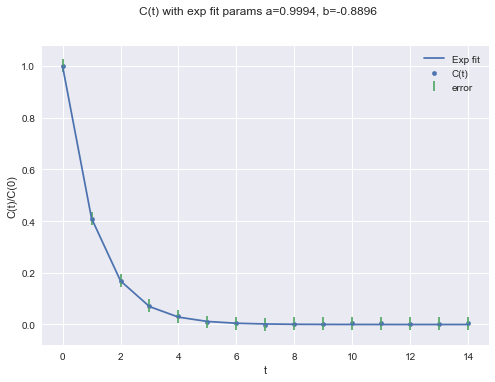

In [76]:
#energy 
#find the parameters for the fit

popt = curve_fit(lambda t,a,b: a*np.exp(b*t),  time, corr_en,p0=(1,0))
## Autocorrelation study
#fit exponential
#error propagation
#error in C(t)
a = popt[0][0]
b = popt[0][1]
corr_en_mean = af.mean(corr_en)
corr_en_var = af.var(corr_en)
err_bars = 1/np.sqrt(af.chisquared(corr_en)*(tmax-2))*np.sqrt(corr_en_var)*np.ones(tmax)
print("Correlation mean {}\tCorrelation var {}\n".format(corr_en_mean,np.sqrt(corr_en_var)))
#scipi optimize coefficients

fit_exp = np.array([a*np.exp(b*t) for t in time])
plt.plot(fit_exp, label="Exp fit")
plt.scatter(time,corr_en,s=20, label="C(t)", )
plt.errorbar(time,corr_en,yerr=err_bars, linestyle="None", label="error")
plt.ylabel("C(t)/C(0)")
plt.xlabel("t")
plt.suptitle("C(t) with exp fit params a={:.4f}, b={:.4f}".format(a,b))
plt.savefig("plots/" + filename + "/C(t)_fit.png")
plt.legend()
#autocorrelation time
#tau = -1/b
#print("Chisquared = {}",format(af.chisquared(fit_exp - corr_t)))

print("Average = {}\n Variance of the mean = {}\n Autocorrelated variance of the mean= {}\n".format(af.mean(energy), af.mean_var(energy), af.mean_var_autocorr(energy,tmax)))



Correlation mean 0.11614709134411225	Correlation var 0.2699709860102878

Average = 0.30118875
 Variance of the mean = 8.60026031494152e-07
 Autocorrelated variance of the mean= 3.856741659796529e-06



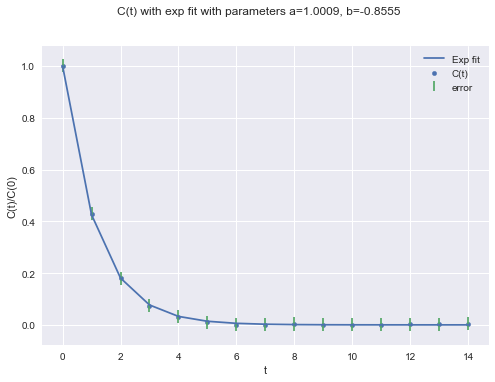

In [77]:
#magnetization
#find the parameters for the fit

popt = curve_fit(lambda t,a,b: a*np.exp(b*t),  time, corr_mg,p0=(1,0))
## Autocorrelation study
#fit exponential
#error propagation
#error in C(t)
a = popt[0][0]
b = popt[0][1]
corr_mg_mean = af.mean(corr_mg)
corr_mg_var = af.var(corr_mg)
err_bars = 1/np.sqrt(af.chisquared(corr_mg)*(tmax-2))*np.sqrt(corr_mg_var)*np.ones(tmax)
print("Correlation mean {}\tCorrelation var {}\n".format(corr_mg_mean,np.sqrt(corr_mg_var)))
#scipi optimize coefficients

fit_exp = np.array([a*np.exp(b*t) for t in time])
plt.plot(fit_exp, label="Exp fit")
plt.scatter(time,corr_mg,s=20, label="C(t)", )
plt.errorbar(time,corr_mg,yerr=err_bars, linestyle="None", label="error")
plt.ylabel("C(t)/C(0)")
plt.xlabel("t")
plt.suptitle("C(t) with exp fit with parameters a={:.4f}, b={:.4f}".format(a,b))
plt.savefig("plots/" + filename + "/C(t)_fit.png")
plt.legend()
#autocorrelation time
#tau = -1/b
#print("Chisquared = {}",format(af.chisquared(fit_exp - corr_t)))

print("Average = {}\n Variance of the mean = {}\n Autocorrelated variance of the mean= {}\n".format(af.mean(magnet), af.mean_var(magnet), af.mean_var_autocorr(magnet,tmax)))




# Binning
Once the integration time has been extrapolated from the fit parameters, we can bin the data in order to remove the impact that autocorrelation has on the data set. The new data will be treated then as uncorrelated. To ensure a good outcome the largest integration time out of all the observables will be the one that will be take as measure of the binning.

The general condition will be

m bin size, tau integration time :

m > 2*tau

Comparing the variance of the min of the binned data should provide more similar results, showcasing how the new binned data doesn't present autocorrelation

In [78]:
#energy
print(energy.shape)
m = 16
bin_energy = af.binning(energy, m)
print("Mean Variance = {} \n Autocorrelated Mean Variance = {}".format(af.mean_var(energy), af.mean_var_autocorr(bin_energy,tmax)))




(100000,)
Mean Variance = 4.54718944687858e-06 
 Autocorrelated Mean Variance = 3.1964305336718516e-05


In [79]:
#maagnetization
print(magnet.shape)
m = 16
bin_energy = af.binning(magnet, m)
print("Mean Variance = {} \nAutocorrelated Mean Variance = {}".format(af.mean_var(energy), af.mean_var_autocorr(bin_energy,tmax)))


(100000,)
Mean Variance = 4.54718944687858e-06 
Autocorrelated Mean Variance = 6.324952170985161e-06
